In [131]:
import os
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
df_cnn = pd.read_csv("commments_unique_users_from_CNN.csv")

In [9]:
# list(set(df_cnn['uniqueAuthorId'][:100]))

In [3]:
df_final = pd.read_csv("unique_users_1000.csv")

In [15]:
df_gpt = df_final[df_final['USER ID'].isin(list(set(df_cnn['uniqueAuthorId'][:100])))]

In [18]:
df_gpt = df_gpt[['USER ID', 'POLITICAL PARTY(GPT)', 'NEWS CHANNEL (GPT)']]

In [24]:
df_gpt['NEWS CHANNEL (GPT)'] = df_gpt['NEWS CHANNEL (GPT)'].replace("Fox", "FOX")

/tmp/ipykernel_3619211/3304955620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gpt['NEWS CHANNEL (GPT)'] = df_gpt['NEWS CHANNEL (GPT)'].replace("Fox", "FOX")


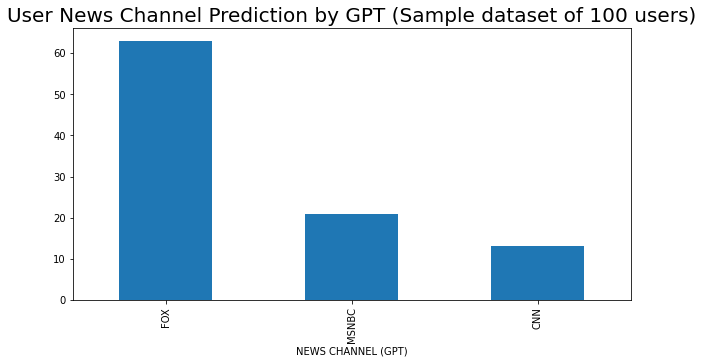

In [137]:
plt.figure( figsize = (10, 5))
df_gpt['NEWS CHANNEL (GPT)'].value_counts().plot(kind = "bar")
plt.title("User News Channel Prediction by GPT (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_gpt_news_prediction.jpg")

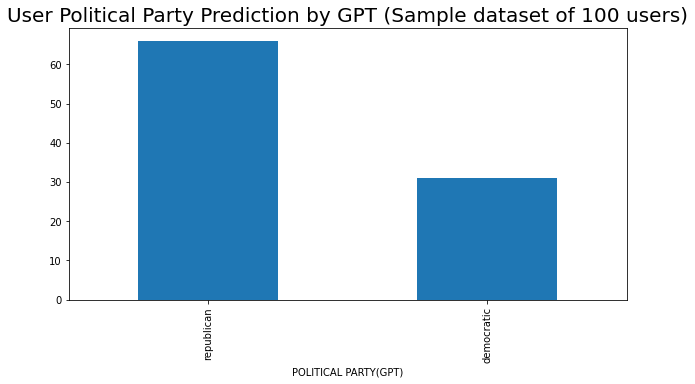

In [138]:
plt.figure( figsize = (10, 5))
df_gpt['POLITICAL PARTY(GPT)'].value_counts().plot( kind = "bar")
plt.title("User Political Party Prediction by GPT (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_gpt_party_prediction.jpg")

In [26]:
df_llama = pd.read_csv("deepinfra - Sheet1.csv")

In [32]:
df_llama = df_llama.rename({"Political Party":"Political Party(Llama)", "News Channel":"News Channel(Llama)"}, axis = 1)

In [41]:
df_llama = df_llama[df_llama['Username'].isin(list(df_gpt['USER ID']))].reset_index( drop = True)

In [112]:
df_llama.rename( columns = {"Username":"USER ID"}, inplace = True)

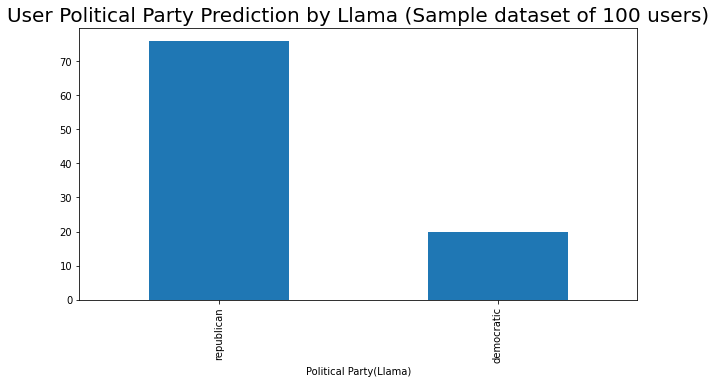

In [141]:
plt.figure( figsize = (10, 5))
df_llama['Political Party(Llama)'].value_counts().plot( kind = "bar")
plt.title("User Political Party Prediction by Llama (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_llama_party_prediction.jpg")

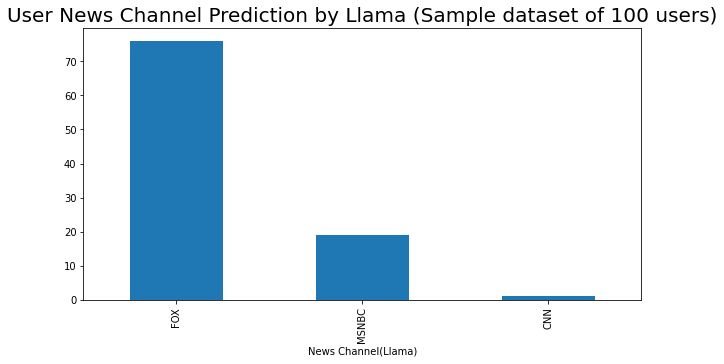

In [140]:
plt.figure( figsize = (10, 5))
df_llama['News Channel(Llama)'].value_counts().plot(kind = "bar")
plt.title("User News Channel Prediction by Llama (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_llama_news_prediction.jpg")

In [46]:
df_cop1 = pd.read_csv("copilot - Sheet1.csv")

In [48]:
df_cop2 = pd.read_csv("Copilot - Sheet1(1).csv")

In [51]:
df_cop2.head(1)

,Username,Political_party,News_channel
0,nuffsaid123smith3,republican,FOX


In [55]:
df_cop1.rename({"Unnamed: 0":"Username", "Unnamed: 1":"Political_party", "Unnamed: 2":"News_channel"}, axis = 1, inplace = True)

In [56]:
df_cop = pd.concat([df_cop1, df_cop2], ignore_index = True)

In [61]:
df_cop['Political_party'] = df_cop['Political_party'].replace("Republican", "republican")
df_cop['Political_party'] = df_cop['Political_party'].replace("demoractic", "democratic")
df_cop['Political_party'] = df_cop['Political_party'].replace("demoratic", "democratic")

In [63]:
plt.figure( figsize = (10, 5))
df_cop['Political_party'].value_counts().plot(kind = "bar")

Political_party
republican      84
democratic       9
undetermined     7
Name: count, dtype: int64

In [66]:
df_cop['News_channel'] = df_cop['News_channel'].replace("Fox", "FOX")

In [72]:
df_cop['Username'] = "@"+df_cop['Username']

In [75]:
df_cop = df_cop[df_cop['Username'].isin(list(df_gpt['USER ID']))]

In [79]:
df_cop.rename({"Political_party":"Political Party(Copilot)", "News_channel":"News Channel(Copilot)"}, axis = 1, inplace = True)

/tmp/ipykernel_3619211/4086076583.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cop.rename({"Political_party":"Political Party(Copilot)", "News_channel":"News Channel(Copilot)"}, axis = 1, inplace = True)


In [110]:
df_cop.rename(columns = {'Username':"USER ID"}, inplace = True)

/tmp/ipykernel_3619211/209073664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cop.rename(columns = {'Username':"USER ID"}, inplace = True)


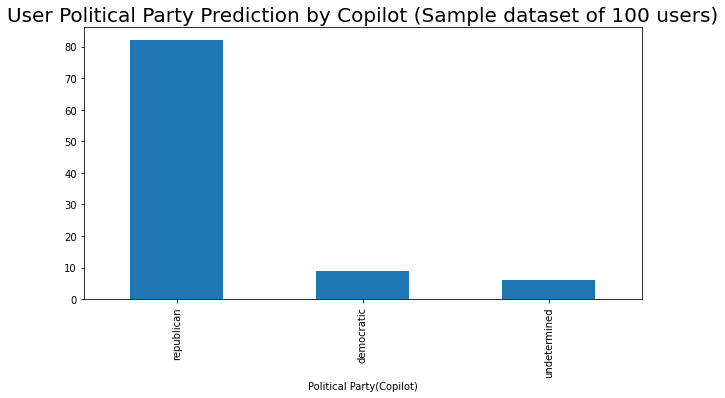

In [142]:
plt.figure( figsize = (10, 5))
df_cop['Political Party(Copilot)'].value_counts().plot( kind = "bar")
plt.title("User Political Party Prediction by Copilot (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_copilot_party_prediction.jpg")

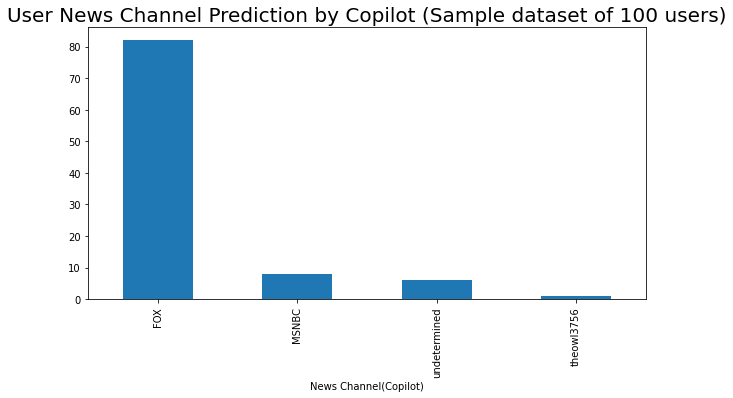

In [143]:
plt.figure( figsize = (10, 5))
df_cop['News Channel(Copilot)'].value_counts().plot( kind = "bar")
plt.title("User News Channel Prediction by Copilot (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_copilot_news_prediction.jpg")

In [92]:
df_mistral = pd.read_csv("Mistral - Sheet1.csv")
df_mistral['USERNAME'] = "@"+df_mistral['USERNAME']
df_mistral = df_mistral[df_mistral['USERNAME'].isin(list(df_gpt['USER ID']))]

In [98]:
df_mistral.rename({"USERNAME":"USER ID", "Poltical_party":"Political Party(Mistral)", 
                   "NEWS CHANNEL":"News Channel(Mistral)"}, axis = 1, inplace = True)

In [102]:
df_mistral['Political Party(Mistral)'] = df_mistral['Political Party(Mistral)'].replace("Republican", "republican")

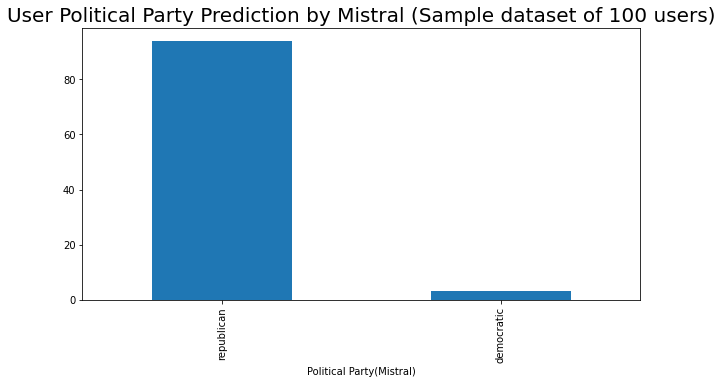

In [144]:
plt.figure( figsize = (10, 5))
df_mistral['Political Party(Mistral)'].value_counts().plot( kind = "bar")
plt.title("User Political Party Prediction by Mistral (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_mistral_party_prediction.jpg")

In [107]:
df_mistral['News Channel(Mistral)'] = df_mistral['News Channel(Mistral)'].replace("Fox", "FOX")

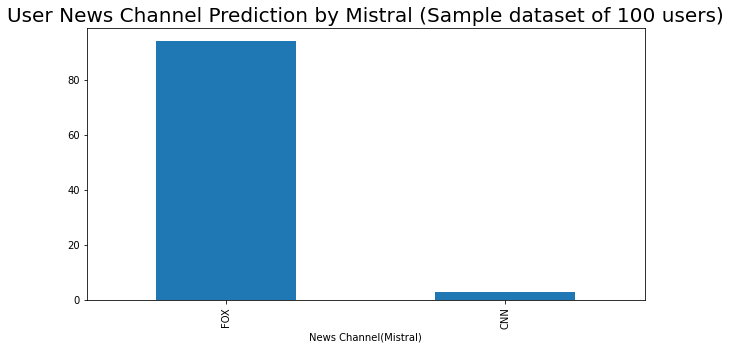

In [146]:
plt.figure( figsize = (10, 5))
df_mistral['News Channel(Mistral)'].value_counts().plot( kind = "bar")
plt.title("User News Channel Prediction by Mistral (Sample dataset of 100 users)", size = 20)
plt.savefig("sample_user_mistral_news_prediction.jpg")

In [121]:
df_con = pd.concat([df_gpt, df_llama, df_cop, df_mistral], axis = 1)

In [127]:
df_con[df_con['POLITICAL PARTY(GPT)'] == "republican"]

,USER ID,POLITICAL PARTY(GPT),NEWS CHANNEL (GPT),USER ID,Political Party(Llama),News Channel(Llama),USER ID,Political Party(Copilot),News Channel(Copilot),USER ID,Political Party(Mistral),News Channel(Mistral)
0,@ericj6559,republican,FOX,@ericj6559,republican,FOX,@ericj6559,republican,FOX,@ericj6559,republican,FOX
1,@RudyRude-wp8ep,republican,FOX,@RudyRude-wp8ep,republican,FOX,@RudyRude-wp8ep,republican,FOX,@RudyRude-wp8ep,republican,FOX
2,@jeffjenkins7979,republican,FOX,@jeffjenkins7979,republican,FOX,@jeffjenkins7979,republican,FOX,@jeffjenkins7979,republican,FOX
3,@TheNqobziNqobz,republican,FOX,@TheNqobziNqobz,republican,FOX,@TheNqobziNqobz,republican,FOX,@TheNqobziNqobz,republican,FOX
4,@allen9129,republican,FOX,@allen9129,republican,FOX,@allen9129,republican,FOX,@allen9129,republican,FOX
...,...,...,...,...,...,...,...,...,...,...,...,...
85,@shitmandood,republican,FOX,@That_Freedom_Guy,republican,FOX,NaN,NaN,NaN,NaN,NaN,NaN
87,@Egill2011,republican,FOX,@spammerscammer,republican,FOX,@ceeceeh6484,republican,FOX,@ceeceeh6484,republican,FOX
92,@razorburns8651,republican,FOX,@enorth15,republican,FOX,@imperija01,republican,FOX,@imperija01,republican,FOX
95,@spammerscammer,republican,FOX,@tomobedlam297,republican,FOX,@razorburns8651,republican,FOX,@razorburns8651,republican,FOX


In [148]:
# df_con.to_csv("final_sample_concatinated_data.csv", index = False)